In [1]:
%%capture --no-stderr
%pip install -U chromadb bertopic openai

In [2]:
import chromadb
import os
import openai
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
from bertopic import BERTopic
from bertopic.representation import OpenAI

import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv(find_dotenv())

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
DATABASE_PATH = "./chroma/"
EMBEDDING_MODEL = "text-embedding-ada-002"



In [3]:
chromadb.configure(allow_reset=True)
client = chromadb.PersistentClient(
    path=os.path.join(DATABASE_PATH, f"{EMBEDDING_MODEL}")
)

In [4]:
coll = client.get_collection("BTW2025")
chroma_docs = coll.get(include=["metadatas", "documents", "embeddings"])

In [5]:
df = pd.DataFrame(chroma_docs['metadatas'])

In [6]:
df['doc'] =  chroma_docs['documents']

In [9]:
df['doc'][10]

'bstbewusste BRICS-Bündnis an, dem sich immer mehr Länder anschließen. Über ein Drittel der globalen Industrieproduktion kommt heute aus China.\n\nDer Kampf um Einflusszonen, um Rohstoffe und Absatzmärkte wird von allen Seiten mit ökonomi- schen, geheimdienstlichen, aber zunehmend auch mit militärischen Mitteln geführt. Noch sind es vor allem Stellvertreter-Kriege, über die die Auseinandersetzung ausgetragen wird. Aber die Gefahr einer direkten militärischen Konfrontation zwischen Atommächten ist so groß wie vielleicht noch nie in der Geschichte der Menschheit.\n\nEin neues Wettrüsten hat begonnen, nachdem nahezu alle Verträge über Rüstungskontrolle und vertrauensbildende Maßnahmen ausgelau- fen sind oder aufgekündigt wurden. Die Hoch- rüstung verschlingt immer mehr Ressourcen und erhöht die Kriegsgefahr, statt sie zu ver- ringern. Das betrifft auch die Gefahr einer durch ein Missverständnis oder einen Computerfehler ausgelösten Katastrophe. Diese gefährliche Entwicklung wollen wir sto

In [53]:
openai_client = openai.OpenAI(api_key=OPENAI_API_KEY)
representation_model = OpenAI(openai_client, delay_in_seconds=5, model="gpt-4o-mini", chat=True)

In [9]:
# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)

In [49]:
topic_model.fit(chroma_docs['documents'], chroma_docs['embeddings'])

In [48]:
topic_model.save("topics.model", serialization="safetensors", save_embedding_model=True)

In [11]:
topic_model.load("topics.model")

2025-01-25 11:34:44,976 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


In [54]:
doc_info = topic_model.get_document_info(chroma_docs['documents'], df=df)

In [55]:
doc_info

,category,element_id,file_directory,filename,filetype,languages,last_modified,orig_elements,page_number,party,source,doc,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,CompositeElement,958e266a99bf8106863611e90ae3a17f,files,BSW_Wahlprogramm_2025.pdf,application/pdf,['deu'],2025-01-16T11:04:49,eJzVWNuO3DYS/RWmn1uC7pd5c9ZJkLW9GKydGLDXGFBSSS...,1,BSW,files/BSW_Wahlprogramm_2025.pdf,Zweitstimme\n\nUnser Land verdient mehr!\n\nWa...,Zweitstimme\n\nUnser Land verdient mehr!\n\nWa...,12,12_Politikwechsel für Wohlstand und Stabilität...,[Politikwechsel für Wohlstand und Stabilität i...,[rer Amtszeit Land und\n\nLeuten besser geht. ...,Politikwechsel für Wohlstand und Stabilität in...,0.437552,False
1,CompositeElement,2660c5e0e01022db612ec6371feab42c,files,BSW_Wahlprogramm_2025.pdf,application/pdf,['deu'],2025-01-16T11:04:49,eJxtVFFv4zYM/iucn5PAsZNc0rcrhm3AFcNw7a4PvSKQLd...,2,BSW,files/BSW_Wahlprogramm_2025.pdf,"eunruhigt die Talfahrt unserer Industrie, der ...","eunruhigt die Talfahrt unserer Industrie, der ...",41,41_Frieden und Außenpolitik in Deutschland,[Frieden und Außenpolitik in Deutschland],"[en, Wirtschaftssanktionen und durch das Verbr...",Frieden und Außenpolitik in Deutschland,0.549694,False
2,CompositeElement,55a004d5e9d5842fc94eb653f0c3737e,files,BSW_Wahlprogramm_2025.pdf,application/pdf,['deu'],2025-01-16T11:04:49,eJzVVE1v2zgQ/SuEzpEg2ZJi55agW6DoB4pNgRzSwKDEoc...,2,BSW,files/BSW_Wahlprogramm_2025.pdf,"tan werden, dass Deutschland nicht in einen Kr...","tan werden, dass Deutschland nicht in einen Kr...",41,41_Frieden und Außenpolitik in Deutschland,[Frieden und Außenpolitik in Deutschland],"[en, Wirtschaftssanktionen und durch das Verbr...",Frieden und Außenpolitik in Deutschland,1.000000,False
3,CompositeElement,3f43a5127b22af9ac0c55c5b46009699,files,BSW_Wahlprogramm_2025.pdf,application/pdf,['deu'],2025-01-16T11:04:49,eJzVVE1r3EAM/SvC5/Xgb3tzLGkDDSmFlAaahkX2yPYQe7...,2,BSW,files/BSW_Wahlprogramm_2025.pdf,aktuelle Hochrüstung ebenso konsequent ablehnt...,aktuelle Hochrüstung ebenso konsequent ablehnt...,41,41_Frieden und Außenpolitik in Deutschland,[Frieden und Außenpolitik in Deutschland],"[en, Wirtschaftssanktionen und durch das Verbr...",Frieden und Außenpolitik in Deutschland,0.844555,False
4,CompositeElement,b08e234a96ec889ccf4ec1390a4a9f93,files,BSW_Wahlprogramm_2025.pdf,application/pdf,['deu'],2025-01-16T11:04:49,eJzVVE1v4zYQ/SsDnS1BliXFzm2DbrdAkKLYpGugaWBQ4k...,3,BSW,files/BSW_Wahlprogramm_2025.pdf,", in dem die Fleißigen belohnt werden und nich...",", in dem die Fleißigen belohnt werden und nich...",-1,-1_Gerechtigkeit und Solidarität in Deutschland,[Gerechtigkeit und Solidarität in Deutschland],[viele Men-\n\n43\n\nschen wie möglich in zumu...,Gerechtigkeit und Solidarität in Deutschland,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,CompositeElement,4bf097bd9c73ee2b9396745bb20822b8,files,volt-programm-bundestagswahl-2025.pdf,application/pdf,['deu'],2025-01-17T15:32:17,eJzdVNtu20YQ/ZUBn02CFG+i3xxYdt24RmErDRDXEJbcIb...,162,Volt,files/volt-programm-bundestagswahl-2025.pdf,port fördert besondere sportliche Talente und ...,port fördert besondere sportliche Talente und ...,33,33_Förderung des Sports in Deutschland und Int...,[Förderung des Sports in Deutschland und Integ...,[istige Perspektive.\n\nGames wollen wir als g...,Förderung des Sports in Deutschland und Integr...,0.313874,False
4531,CompositeElement,6ac1f0b256ef67e1a37a108d1231fa30,files,volt-programm-bundestagswahl-2025.pdf,application/pdf,['deu'],2025-01-17T15:32:17,eJzdVElr3DAU/ivC55GxPONtbgltaEkKgZT2kIZBtp5tMb...,162,Volt,files/volt-programm-bundestagswahl-2025.pdf,"s Modell eingeführt, das berufliche Perspektiv...","s Modell eingeführt, das berufliche Perspektiv...",33,33_Förderung des Sports in Deutschland und Int...,[Förderung des Sports in Deutschland und Integ...,[istige Perspektive.\n\nGames wollen wir als g...,Förderung des Sports i

In [56]:
topic_df = topic_model.get_topic_info()
topic_df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,763,-1_Gerechtigkeit und Solidarität in Deutschland,[Gerechtigkeit und Solidarität in Deutschland],[viele Men-\n\n43\n\nschen wie möglich in zumu...
1,0,184,0_Klimaschutz und Netzentgelte in der deutsche...,[Klimaschutz und Netzentgelte in der deutschen...,[und Ängste ausgelöst und neue Fragen aufgewor...
2,1,142,1_Verkehrsinfrastruktur und Mobilitätswende in...,[Verkehrsinfrastruktur und Mobilitätswende in ...,"[eden Tag nicht nur Nerven, sondern auch Zeit ..."
3,2,130,2_Integration und Asylpolitik in Deutschland,[Integration und Asylpolitik in Deutschland],[ür eine Politik der Ausgrenzung steht. Mit ih...
4,3,108,3_Inclusive Education and Individualized Learn...,[Inclusive Education and Individualized Learni...,[auszurichten.\n\nKinder- und jugendzentrierte...
...,...,...,...,...,...
127,126,11,126_Effizientes und menschenwürdiges Asylsyste...,[Effizientes und menschenwürdiges Asylsystem i...,[werden zurückgenommen und Asylverfahren in La...
128,127,11,127_Abtreibungen und Mütterliche Unterstützung,[Abtreibungen und Mütterliche Unterstützung],[ren hinreichend über schwere Abtreibungsfolge...
129,128,11,128_Gendergerechtigkeit und Diversität in Bild...,[Gendergerechtigkeit und Diversität in Bildung...,[gleichermaßen gerecht werden. Das bestehende ...
130,129,11,129_Flüchtlingsintegration und Unterstützung i...,[Flüchtlingsintegration und Unterstützung in D...,[he Infrastruktur und den sozialen\n\n2490 Zus...


In [57]:
topic_df[:10]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,763,-1_Gerechtigkeit und Solidarität in Deutschland,[Gerechtigkeit und Solidarität in Deutschland],[viele Men-\n\n43\n\nschen wie möglich in zumu...
1,0,184,0_Klimaschutz und Netzentgelte in der deutsche...,[Klimaschutz und Netzentgelte in der deutschen...,[und Ängste ausgelöst und neue Fragen aufgewor...
2,1,142,1_Verkehrsinfrastruktur und Mobilitätswende in...,[Verkehrsinfrastruktur und Mobilitätswende in ...,"[eden Tag nicht nur Nerven, sondern auch Zeit ..."
3,2,130,2_Integration und Asylpolitik in Deutschland,[Integration und Asylpolitik in Deutschland],[ür eine Politik der Ausgrenzung steht. Mit ih...
4,3,108,3_Inclusive Education and Individualized Learn...,[Inclusive Education and Individualized Learni...,[auszurichten.\n\nKinder- und jugendzentrierte...
5,4,103,4_Verbesserung der Pflege- und Gesundheitsvers...,[Verbesserung der Pflege- und Gesundheitsverso...,[gung begren- zen. Deshalb wollen wir öffentli...
6,5,73,5_Bezahlbarer Wohnraum und Mietpreisbremse,[Bezahlbarer Wohnraum und Mietpreisbremse],[mse fallen und von der Plattform\n\nüberprüft...
7,6,71,6_Tierschutz und nachhaltige Landwirtschaft in...,[Tierschutz und nachhaltige Landwirtschaft in ...,[ang die Identität der ländlichen Räume gepräg...
8,7,66,7_Antisemitismus und Extremismusbekämpfung in ...,[Antisemitismus und Extremismusbekämpfung in D...,[ment rechtsextremer Einstellungen und drückt ...
9,8,59,8_Systemwechsel in der Pflege,[Systemwechsel in der Pflege],[nen Systemwechsel in der Pflege\n\n831 ein: F...


In [58]:
topics_to_merge = [[2, 6], [7, 33,49], [16, 44, 46, 55], [1, 39, 56, 92]]
topic_model.merge_topics(chroma_docs['documents'], topics_to_merge)

KeyboardInterrupt: 

In [66]:
count_df = doc_info.groupby(['Topic', 'party']).size().reset_index(name='Count')
result_df = count_df.pivot(index='Topic', columns='party', values='Count').fillna(0)
percentage_columns = [f'{party}_Percentage' for party in result_df.columns if party != 'Topic' and party != 'Total']
result_df['Total'] = result_df.sum(axis=1)
for party in result_df.columns[0:-1]:  # Exclude 'Total' column
    result_df[f'{party}_Percentage'] = (result_df[party] / result_df['Total']) * 100
result_df.reset_index(inplace=True)
result_df["title"] = topic_df['Name']

result_df

party,Topic,AfD,BSW,CDU,FDP,Grüne,Linke,SPD,Volt,Total,AfD_Percentage,BSW_Percentage,CDU_Percentage,FDP_Percentage,Grüne_Percentage,Linke_Percentage,SPD_Percentage,Volt_Percentage,title
0,-1,165.0,66.0,95.0,52.0,59.0,76.0,93.0,157.0,763.0,21.625164,8.650066,12.450852,6.815203,7.732634,9.960682,12.188729,20.576671,-1_Gerechtigkeit und Solidarität in Deutschland
1,0,0.0,20.0,24.0,8.0,43.0,0.0,46.0,43.0,184.0,0.000000,10.869565,13.043478,4.347826,23.369565,0.000000,25.000000,23.369565,0_Klimaschutz und Netzentgelte in der deutsche...
2,1,7.0,11.0,17.0,14.0,14.0,30.0,28.0,21.0,142.0,4.929577,7.746479,11.971831,9.859155,9.859155,21.126761,19.718310,14.788732,1_Verkehrsinfrastruktur und Mobilitätswende in...
3,2,55.0,12.0,17.0,6.0,13.0,0.0,27.0,0.0,130.0,42.307692,9.230769,13.076923,4.615385,10.000000,0.000000,20.769231,0.000000,2_Integration und Asylpolitik in Deutschland
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3_Inclusive Education and Individualized Learn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,126_Effizientes und menschenwürdiges Asylsyste...
128,127,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,63.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.363636,127_Abtreibungen und Mütterliche Unterstützung
129,128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,128_Gendergerechtigkeit und Diversität in Bild...
130,129,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,129_Flüchtlingsintegration und Unterstützung i...


In [67]:
result_df[:20]

party,Topic,AfD,BSW,CDU,FDP,Grüne,Linke,SPD,Volt,Total,AfD_Percentage,BSW_Percentage,CDU_Percentage,FDP_Percentage,Grüne_Percentage,Linke_Percentage,SPD_Percentage,Volt_Percentage,title
0,-1,165.0,66.0,95.0,52.0,59.0,76.0,93.0,157.0,763.0,21.625164,8.650066,12.450852,6.815203,7.732634,9.960682,12.188729,20.576671,-1_Gerechtigkeit und Solidarität in Deutschland
1,0,0.0,20.0,24.0,8.0,43.0,0.0,46.0,43.0,184.0,0.000000,10.869565,13.043478,4.347826,23.369565,0.000000,25.000000,23.369565,0_Klimaschutz und Netzentgelte in der deutsche...
2,1,7.0,11.0,17.0,14.0,14.0,30.0,28.0,21.0,142.0,4.929577,7.746479,11.971831,9.859155,9.859155,21.126761,19.718310,14.788732,1_Verkehrsinfrastruktur und Mobilitätswende in...
3,2,55.0,12.0,17.0,6.0,13.0,0.0,27.0,0.0,130.0,42.307692,9.230769,13.076923,4.615385,10.000000,0.000000,20.769231,0.000000,2_Integration und Asylpolitik in Deutschland
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3_Inclusive Education and Individualized Learn...
5,4,3.0,5.0,19.0,9.0,16.0,0.0,50.0,1.0,103.0,2.912621,4.854369,18.446602,8.737864,15.533981,0.000000,48.543689,0.970874,4_Verbesserung der Pflege- und Gesundheitsvers...
6,5,8.0,6.0,9.0,5.0,7.0,0.0,30.0,8.0,73.0,10.958904,8.219178,12.328767,6.849315,9.589041,0.000000,41.095890,10.958904,5_Bezahlbarer Wohnraum und Mietpreisbremse
7,6,22.0,9.0,13.0,5.0,14.0,0.0,6.0,2.0,71.0,30.985915,12.676056,18.309859,7.042254,19.718310,0.000000,8.450704,2.816901,6_Tierschutz und nachhaltige Landwirtschaft in...
8,7,20.0,0.0,13.0,6.0,3.0,0.0,19.0,5.0,66.0,30.303030,0.000000,19.696970,9.090909,4.545455,0.000000,28.787879,7.575758,7_Antisemitismus und Extremismusbekämpfung in ...
9,8,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,59.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,8_Systemwechsel in der Pflege


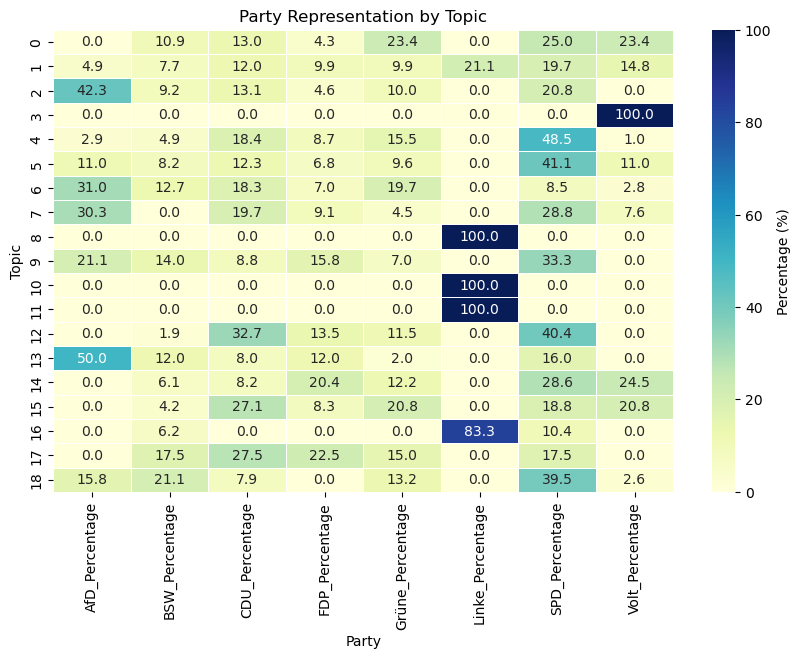

In [68]:
# Prepare DataFrame for heatmap

heatmap_data = result_df[percentage_columns]

# Set index to 'Topic' for proper labeling in the heatmap
heatmap_data.index = result_df['Topic']

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data[1:20], annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
plt.title('Party Representation by Topic')
plt.xlabel('Party')
plt.ylabel('Topic')
plt.show()

In [ ]:
for name, group in doc_info.groupby(["Topic", "party"]):
    print(name, group)

In [42]:
all_topics = topic_model.get_topics()

In [43]:
len(all_topics)

124

In [44]:
all_topics

{-1: [('Wirtschaft und Zukunftsstrategien für Deutschland', 1)],
 0: [('Reform des europäischen Asylrechts und Integration von Geflüchteten in Deutschland',
   1)],
 1: [('Verbesserung der Pflegebedingungen und Finanzierungssysteme', 1)],
 2: [('Infrastruktur und Mobilität in Deutschland', 1)],
 3: [('Förderung der Bildung und Ausbildung in Deutschland', 1)],
 4: [('Energiepolitik und Klimaschutz in Deutschland', 1)],
 5: [('Nachhaltige Landwirtschaft und Agrarförderung', 1)],
 6: [('Mietpreisbremse und Bezahlbarer Wohnraum', 1)],
 7: [('Steuerreform und Entlastung von Arbeitseinkommen in Deutschland', 1)],
 8: [('Energiewende und Klimaschutz durch dezentrale Energieversorgung und soziale Maßnahmen',
   1)],
 9: [('Verbesserung der Arbeitsbedingungen und soziale Absicherung in Deutschland',
   1)],
 10: [('Politikwechsel für Wohlstand und Stabilität in Deutschland', 1)],
 11: [('Gesetzliche Regelungen zur Bekämpfung von Jugendkriminalität und Ausländerkriminalität',
   1)],
 12: [('Ges

In [69]:
topic_model.hierarchical_topics(chroma_docs['documents'], use_ctfidf=False)

  9%|▉         | 12/130 [01:08<11:17,  5.74s/it]


IndexError: index (124) out of range

In [ ]:
hierarchy = _

In [ ]:
hierarchy.to_csv("hierarchy.csv")

In [40]:
topic_model.get_topic_info()[1:10]

,Topic,Count,Name,Representation,Representative_Docs
1,0,214,0_Energie- und Klimapolitik für eine wettbewer...,[Energie- und Klimapolitik für eine wettbewerb...,"[is.\n\nBesonders im Norden und Osten, wo ein ..."
2,1,109,1_Integration und Migration in Deutschland,[Integration und Migration in Deutschland],[traftätern. Die Externalisierung von Asylverf...
3,2,95,2_Unterstützung der Ukraine und Stärkung der E...,[Unterstützung der Ukraine und Stärkung der Eu...,[erneuten Wahl von Donald Trump als US-Präside...
4,3,89,3_Mobilität und infrastrukturelle Erneuerung i...,[Mobilität und infrastrukturelle Erneuerung in...,[e Autoindustrie wäre wirtschafts- und klimapo...
5,4,64,4_Antisemitismus und Extremismusbekämpfung in ...,[Antisemitismus und Extremismusbekämpfung in D...,[in öffentlichen und digitalen Räumen durch Re...
6,5,58,5_Systemwechsel in der Pflege und Verbesserung...,[Systemwechsel in der Pflege und Verbesserung ...,[nen Systemwechsel in der Pflege\n\n831 ein: F...
7,6,55,6_Klimaschutz und Energiewende in Deutschland,[Klimaschutz und Energiewende in Deutschland],[ssen sie\n\n1418\n\nkonsequent abgeschöpft we...
8,7,52,7_Arbeitsmarktpolitik und soziale Sicherheit i...,[Arbeitsmarktpolitik und soziale Sicherheit in...,[n für veränderte Anforderungen und Aufgaben\n...
9,8,52,8_Geschlechtsspezifische Gewalt und Gleichstel...,[Geschlechtsspezifische Gewalt und Gleichstell...,"[tem, das Sicherheit im analogen und digitalen..."


In [39]:
fig = topic_model.visualize_document_datamap(chroma_docs['documents'], embeddings=chroma_docs['embeddings'])
fig.write_html("heatmap.html")

# Show the figure
from IPython.display import HTML
HTML(filename="heatmap.html")

NameError: name 'datamapplot' is not defined

In [18]:
document_info = topic_model.get_document_info(docs['documents'])

In [19]:
document_info

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Zweitstimme\n\nUnser Land verdient mehr!\n\nWa...,10,10_land_wieder_jetzt_politik,"[land, wieder, jetzt, politik, unser, es, kraf...",[rer Amtszeit Land und\n\nLeuten besser geht. ...,land - wieder - jetzt - politik - unser - es -...,1.000000,False
1,"eunruhigt die Talfahrt unserer Industrie, der ...",49,49_krieg_krieges_militrausgaben_russland,"[krieg, krieges, militrausgaben, russland, sin...",[gelösten Katastrophe. Diese gefährliche Entwi...,krieg - krieges - militrausgaben - russland - ...,0.532807,False
2,"tan werden, dass Deutschland nicht in einen Kr...",49,49_krieg_krieges_militrausgaben_russland,"[krieg, krieges, militrausgaben, russland, sin...",[gelösten Katastrophe. Diese gefährliche Entwi...,krieg - krieges - militrausgaben - russland - ...,1.000000,False
3,aktuelle Hochrüstung ebenso konsequent ablehnt...,49,49_krieg_krieges_militrausgaben_russland,"[krieg, krieges, militrausgaben, russland, sin...",[gelösten Katastrophe. Diese gefährliche Entwi...,krieg - krieges - militrausgaben - russland - ...,0.746483,False
4,", in dem die Fleißigen belohnt werden und nich...",-1,-1_und_fr_die_der,"[und, fr, die, der, zu, in, wir, eine, von, ein]","[t haben, sich einzubringen und Teil unse- rer...",und - fr - die - der - zu - in - wir - eine - ...,0.000000,False
...,...,...,...,...,...,...,...,...
4530,port fördert besondere sportliche Talente und ...,44,44_sport_breitensport_spiele_sports,"[sport, breitensport, spiele, sports, bewegung...",[istige Perspektive.\n\nGames wollen wir als g...,sport - breitensport - spiele - sports - beweg...,0.452899,False
4531,"s Modell eingeführt, das berufliche Perspektiv...",-1,-1_und_fr_die_der,"[und, fr, die, der, zu, in, wir, eine, von, ein]","[t haben, sich einzubringen und Teil unse- rer...",und - fr - die - der - zu - in - wir - eine - ...,0.000000,False
4532,nd in unserer Freizeit. Deshalb setzt sich Vol...,-1,-1_und_fr_die_der,"[und, fr, die, der, zu, in, wir, eine, von, ein]","[t haben, sich einzubringen und Teil unse- rer...",und - fr - die - der - zu - in - wir - eine - ...,0.000000,False
4533,"rganisiert, um gesundheitliche Vorteile für al...",-1,-1_und_fr_die_der,"[und, fr, die, der, zu, in, wir, eine, von, ein]","[t haben, sich einzubringen und Teil unse- rer...",und - fr - die - der - zu - in - wir - eine - ...,0.000000,False


In [65]:
fig = topic_model.visualize_documents(chroma_docs['documents'], embeddings=chroma_docs['embeddings'])
fig.write_html("topics.html")
